In [ ]:
# population.csv 파일을 읽어서 리스트 변수에 저장
# 저장 형식은 m_da_one.ipynb 파일 참고

# 파일에서 데이터 읽기
with open('data-files/population.csv', 'rt', encoding="euc-kr") as f:
    lines = f.readlines()

In [4]:
print( len(lines) )
lines[1:3]

3911


['"서울특별시  (1100000000)","9,331,860","9,331,860","40,946","37,352","39,165","41,604","42,812","45,548","49,350","53,055","59,419","65,648","66,937","65,873","72,854","71,920","73,845","69,040","71,789","77,981","75,706","76,692","84,617","93,258","97,401","110,390","134,301","141,615","146,902","157,555","161,196","166,572","166,002","164,148","165,795","160,210","143,778","136,659","133,394","126,097","125,400","126,452","123,613","135,411","142,684","149,830","147,503","147,690","131,607","132,065","130,899","134,479","142,218","152,046","154,691","159,802","160,104","153,385","154,264","139,249","132,277","135,142","136,133","124,663","141,643","134,747","149,407","142,037","131,312","127,326","118,368","115,382","117,618","92,273","95,003","78,849","71,447","77,060","73,003","73,204","69,817","49,282","51,070","48,283","53,698","48,385","36,476","32,886","29,271","23,884","20,576","17,029","13,618","10,341","7,818","6,086","4,324","3,480","2,654","1,800","1,226","645","1,499","4,501

In [ ]:
# 한 행을 ,로 구분해서 리스트로 만들기 + 숫자형식의 문자열 -> 숫자 변환
row = lines[1].split('","')
# int(row[1]) # 오류 발생 : "1,234,567"은 쉼표 때문에 숫자 변환 불가능
# int(row[1].replace(",", ""))
row[0] = row[0][1:] # "서울 -> 서울
for i in range(1, len(row)):
    row[i] = int(row[i].replace(",", "").replace('"\n', ""))

row

In [20]:
# 모든 행에 위의 행 처리 구현 적용

rows = []
for line in lines[1:]: # 제목 행은 빼고 데이터 행 반복
    row = line.split('","')
    row[0] = row[0][1:] 
    for i in range(1, len(row)):
        row[i] = int(row[i].replace(",", "").replace('"\n', ""))

    rows.append(row)

In [ ]:
rows[:2]

In [ ]:
# csv 모듈을 사용해서 csv 파일 읽기

import csv

rows2 = []
with open('data-files/population.csv', 'rt', encoding="euc-kr") as f:
    reader = csv.reader(f) # csv 모듈을 사용해서 파일 읽기 준비

    titles = next(reader) # next : 현재 행을 읽고 다음 행 위치로 이동하는 명령 / 여기서는 첫 번째 행 건너뛰기
    for row in reader: # 파일을 다 읽을 때까지 next를 반복하면서 각 행을 row에 저장

        for i in range(1, len(row)): # 이 반복이 이루어지는 동안 row는 변경되지 않음
            row[i] = int(row[i].replace(",", "")) 
            # rows2.append(row) # 여기에 append가 있으면 같은 행을 반복해서 추가하는 효과 발생
        
        rows2.append(row)

In [8]:
print( rows2[0][:3] )
print( rows2[1][:3] )
print( rows2[2][:3] )
print( rows2[300][:3] )

['서울특별시  (1100000000)', 9331860, 9331860]
['서울특별시 종로구 (1111000000)', 138096, 138096]
['서울특별시 종로구 청운효자동(1111051500)', 11015, 11015]
['서울특별시 금천구 시흥제1동(1154567000)', 31555, 31555]


In [ ]:
# 읍면동 수준에서 인구가 가장 많은 행정구역(행), 가장 적은 행정구역(행) 찾기
# - 읍면동 수준은 각 행의 첫 번째 데이터(행정구역)의 뒤에서 6번째 (-6) 문자가 '0'이 아닌 경우

In [23]:
rows2[0][0], rows2[0][1]


('서울특별시  (1100000000)', 9331860)

In [ ]:
max_pop_row = None
min_pop_row = None

# for i in range(0, len(rows2)):
for row in rows2:
    # if not row[0][-6] == '0':
    if row[0][-6] != '0':
        
        if max_pop_row == None or max_pop_row[1] < row[1]:
            max_pop_row = row
        if min_pop_row == None or min_pop_row[1] > row[1]:
            min_pop_row = row

In [27]:
max_pop_row[:2], min_pop_row[:2]

(['경상남도 양산시 물금읍(4833025300)', 116463], ['충청북도 진천군 덕산읍혁신도시출장소(4375025400)', 0])

In [ ]:
# 남성인구비가 가장 높은 / 낮은 읍면동 찾기
# - 읍면동 구분 : 행정구역(각 행 0번째 데이터) 문자열 데이터의 -6번째(뒤에서 6번째) 문자가 '0' 아닌 행
# - 남성인구비 : 남성인구 (104번째 데이터) / 총인구(1번째 데이터)

In [30]:
titles[1], titles[104]

('2025년04월_계_총인구수', '2025년04월_남_총인구수')

In [ ]:
max_ratio_row = rows2[2]
min_ratio_row = rows2[2]

for row in rows2: # 각 행을 반복 : row는 행 데이터가 저장됨

    if row[0][-6] != '0' and row[1] > 0: # row[0][-6] != '0' : 읍면동찾기 / row[1] > 0 : 0으로 나누는 오류 방지

        current_male_ratio = row[104] / row[1] # 반복문에서 현재 처리 중인 행의 남성 인구 비율
        max_male_ratio = max_ratio_row[104] / max_ratio_row[1] # 현재까지 처리된 행 중 가장 높은 남성 인구 비율
        min_male_ratio = min_ratio_row[104] / min_ratio_row[1] # 현재까지 처리된 행 중 가장 낮은 남성 인구 비율

        if max_male_ratio < current_male_ratio: # 새로운 남성 비율 최고값 발견
            max_ratio_row = row                 # 남성 비율 최고행을 현재행으로 교체
        if min_male_ratio > current_male_ratio: # 새로운 남성 비율 최저값 발견
            min_ratio_row = row                 # 남성 비율 최저행을 현재행으로 교체

In [17]:
print(max_ratio_row[:2])
print(min_ratio_row[:2])

['경기도 파주시 월롱면(4148031000)', 8105]
['서울특별시 성북구 동선동(1129057500)', 14845]


In [ ]:
# 문자열에서 특정 문자열의 포함 여부 확인 방법
print( 'abc' in 'abcdefghi' ) # 'abc'가 'abcdefghi'에 포함된 경우 True / 아니면 False
print( 'xyz' in 'abcdefghi' ) # 'xyz'가 'abcdefghi'에 포함된 경우 True / 아니면 False

# print( 'abcdefghi'.index('cde') ) # 이 값이 0 이상이면 포함
# print( 'abcdefghi'.index('xyz') ) # 오류가 발생하면 불포함

True
False


In [30]:
titles[103] # 100세 이상 인구 위치

'2025년04월_계_100세 이상'

1
[['서울특별시 영등포구 영등포동(1156053500)', 31233, 31233, 129, 91, 110, 108, 97, 102, 86, 83, 86, 94, 98, 77, 65, 86, 72, 70, 70, 73, 104, 98, 136, 195, 255, 377, 618, 875, 1120, 1271, 1490, 1483, 1425, 1330, 1340, 1151, 924, 797, 683, 628, 599, 516, 444, 413, 403, 401, 378, 391, 283, 276, 304, 304, 286, 337, 339, 375, 358, 325, 343, 326, 307, 318, 309, 271, 323, 306, 333, 299, 294, 289, 280, 232, 248, 199, 212, 154, 133, 149, 125, 136, 117, 92, 102, 89, 102, 89, 65, 57, 53, 51, 33, 30, 42, 20, 20, 10, 10, 11, 6, 9, 3, 2, 5, 15824, 15824, 69, 47, 49, 54, 49, 50, 37, 41, 34, 44, 55, 38, 38, 46, 31, 43, 34, 34, 59, 46, 53, 78, 96, 114, 177, 267, 419, 487, 612, 699, 699, 707, 704, 598, 507, 413, 369, 351, 332, 286, 253, 239, 214, 223, 222, 214, 144, 159, 169, 170, 167, 187, 200, 219, 221, 201, 214, 196, 191, 190, 204, 176, 198, 186, 204, 179, 185, 177, 159, 130, 134, 107, 125, 97, 72, 72, 63, 56, 50, 50, 39, 47, 45, 37, 33, 22, 25, 22, 14, 11, 12, 7, 7, 3, 2, 3, 2, 5, 3, 0, 2, 15409, 15409, 60, 44

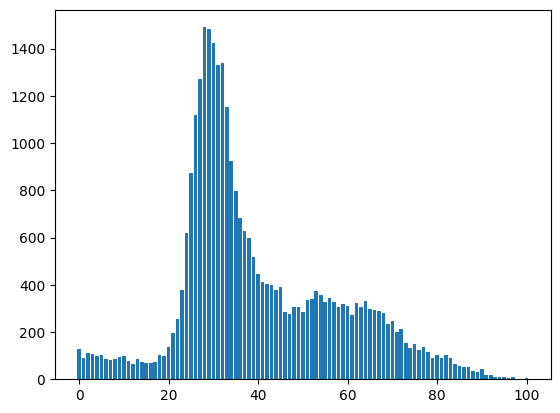

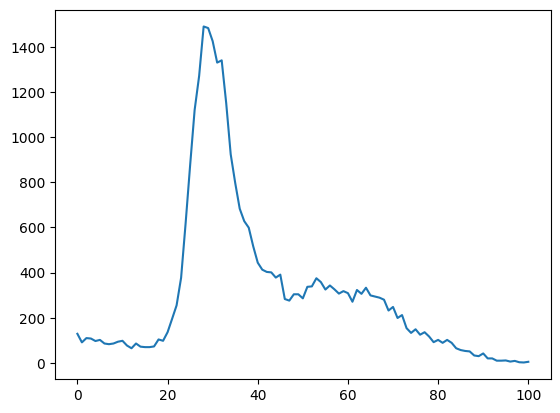

In [45]:
# 특정 읍면동의 연령별 인구 분포를 그래프로 표시 ('영등포동'으로 테스트)
# - 특정 읍면동 찾기 : 각 행의 0번째 데이터(행정구역명)에 '영등포동'이 포함된 행
# - 찾은 행의 0세(각 행의 3번째 데이터) ~ 100세(각 행의 103번째 데이터) 데이터를 막대그래프로 표현

# 1-1. 데이터 찾기
selected_rows = []
for row in rows2:
    # if row[0][-6] != '0' and '영등포동' in row[0]:
    if '영등포동' in row[0]:
    # if '신당동' in row[0]:
    # if '철원' in row[0]:
        selected_rows.append(row)
        

# 1-2. 데이터 찾기 테스트 (주석 처리 가능)
print( len(selected_rows) )
print( selected_rows[:3] )

# 2-1. 찾은 데이터로 막대 그래프 그리기
import matplotlib.pyplot as plt # 그래프 그리기 도구 모듈 가져오기

plt.bar(range(101),  selected_rows[0][3:104])
plt.show()

# 2-2. 찾은 데이터로 선 그래프 그리기
plt.plot(range(101),  selected_rows[0][3:104])
plt.show()

In [62]:
a = [ 1, 2, 3, 4, 5, 6, 7, 8, 9, 10 ]

# 리스트에 포함된 모든 값의 부호를 반대 부호로 변경하는 처리
# 1
b = []
for v in a:
    b.append(-v)
print(b)

# 2
c = [ -v for v in a ] # 1의 구문과 동일한 효과
# c = [ v * 10 - 2 for v in a ] # 1의 구문과 동일한 효과
print(c)

# 리스트에 포함된 값 중 짝수 값만 뽑아서 부호를 반대 부호로 변경하는 처리
# 1
b = []
for v in a:
    if v % 2 == 0: # 짝수 조건
        b.append(-v)
print(b)

# 2
c = [ -v for v in a if v % 2 == 0 ] # 1의 구문과 동일한 효과
# c = [ v * 10 - 2 for v in a ] # 1의 구문과 동일한 효과
print(c)

[-1, -2, -3, -4, -5, -6, -7, -8, -9, -10]
[-1, -2, -3, -4, -5, -6, -7, -8, -9, -10]
[-2, -4, -6, -8, -10]
[-2, -4, -6, -8, -10]


1
[['서울특별시 영등포구 영등포동(1156053500)', 31233, 31233, 129, 91, 110, 108, 97, 102, 86, 83, 86, 94, 98, 77, 65, 86, 72, 70, 70, 73, 104, 98, 136, 195, 255, 377, 618, 875, 1120, 1271, 1490, 1483, 1425, 1330, 1340, 1151, 924, 797, 683, 628, 599, 516, 444, 413, 403, 401, 378, 391, 283, 276, 304, 304, 286, 337, 339, 375, 358, 325, 343, 326, 307, 318, 309, 271, 323, 306, 333, 299, 294, 289, 280, 232, 248, 199, 212, 154, 133, 149, 125, 136, 117, 92, 102, 89, 102, 89, 65, 57, 53, 51, 33, 30, 42, 20, 20, 10, 10, 11, 6, 9, 3, 2, 5, 15824, 15824, 69, 47, 49, 54, 49, 50, 37, 41, 34, 44, 55, 38, 38, 46, 31, 43, 34, 34, 59, 46, 53, 78, 96, 114, 177, 267, 419, 487, 612, 699, 699, 707, 704, 598, 507, 413, 369, 351, 332, 286, 253, 239, 214, 223, 222, 214, 144, 159, 169, 170, 167, 187, 200, 219, 221, 201, 214, 196, 191, 190, 204, 176, 198, 186, 204, 179, 185, 177, 159, 130, 134, 107, 125, 97, 72, 72, 63, 56, 50, 50, 39, 47, 45, 37, 33, 22, 25, 22, 14, 11, 12, 7, 7, 3, 2, 3, 2, 5, 3, 0, 2, 15409, 15409, 60, 44

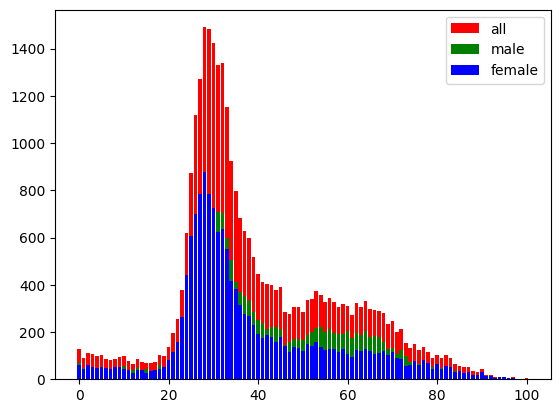

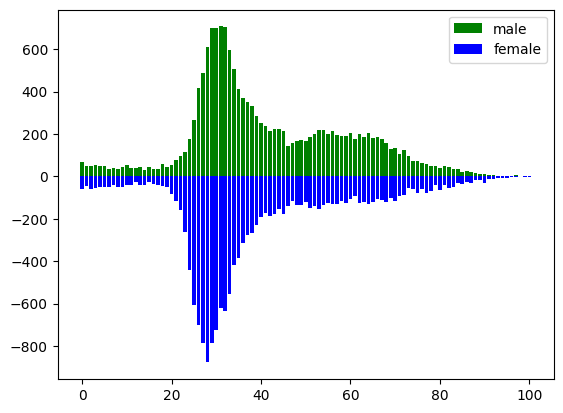

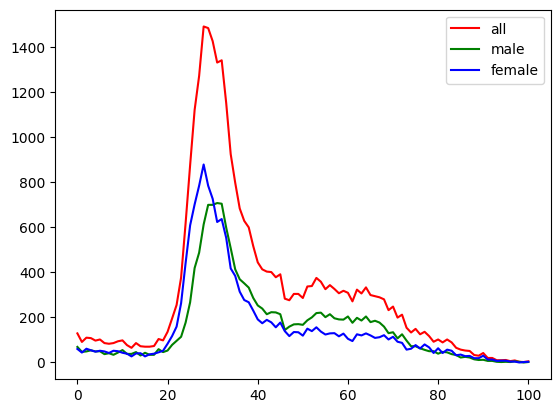

In [60]:
# 특정 읍면동의 성별 + 연령별 인구 분포를 그래프로 표시 ('영등포동'으로 테스트)
# - 특정 읍면동 찾기 : 각 행의 0번째 데이터(행정구역명)에 '영등포동'이 포함된 행
# - 찾은 행의 0세(각 행의 3번째 데이터) ~ 100세(각 행의 103번째 데이터) 데이터를 막대그래프로 표현

# 1-1. 데이터 찾기
selected_rows = []
for row in rows2:
    # if row[0][-6] != '0' and '영등포동' in row[0]:
    if '영등포동' in row[0]:
        selected_rows.append(row)
        

# 1-2. 데이터 찾기 테스트 (주석 처리 가능)
print( len(selected_rows) )
print( selected_rows[:3] )

# 2-1. 찾은 데이터로 막대 그래프 그리기 1
import matplotlib.pyplot as plt # 그래프 그리기 도구 모듈 가져오기

plt.bar(range(101), selected_rows[0][3:104], color='red', label='all') # (x축데이터, y축데이터, 색상, 그래프이름)
plt.bar(range(101), selected_rows[0][106:207], color='green', label='male')
plt.bar(range(101), selected_rows[0][209:310], color='blue', label='female')
plt.legend() # 각 그래프 이름이 화면에 표시됩니다.
plt.show() # show 이전까지 그린 그래프는 한 그래프 영역에 동시에 표시됩니다.

# 2-2. 찾은 데이터로 막대 그래프 그리기 2
female_values = [ -v for v in selected_rows[0][209:310] ]  # 원 데이터를 음수로 변경하는 처리
plt.bar(range(101), selected_rows[0][106:207], color='green', label='male')
plt.bar(range(101), female_values, color='blue', label='female')
plt.legend() # 각 그래프 이름이 화면에 표시됩니다.
plt.show() # show 이전까지 그린 그래프는 한 그래프 영역에 동시에 표시됩니다.

# 2-3. 찾은 데이터로 선 그래프 그리기
plt.plot(range(101), selected_rows[0][3:104], color='red', label='all') # (x축데이터, y축데이터, 색상, 그래프이름)
plt.plot(range(101), selected_rows[0][106:207], color='green', label='male')
plt.plot(range(101), selected_rows[0][209:310], color='blue', label='female')
plt.legend() # 각 그래프 이름이 화면에 표시됩니다.
plt.show() # show 이전까지 그린 그래프는 한 그래프 영역에 동시에 표시됩니다.

In [49]:
titles[106], titles[206], titles[209], titles[309]

('2025년04월_남_0세', '2025년04월_남_100세 이상', '2025년04월_여_0세', '2025년04월_여_100세 이상')